**Name: Bhargavi Satish Bhende**

**PRN: RBT21CB053**

***Project Title***: SMS Spam Classification using SVM and Naive Bayes

***Problem Statement:***
The exponential growth of mobile communication has led to a significant increase in SMS (Short Message Service) messages. While SMS is a convenient means of communication, it has also become a platform for spam and unsolicited messages. These spam messages can be not only annoying but also potentially harmful. The challenge is to develop an efficient system that can accurately distinguish between legitimate and spam SMS messages, thus enhancing the overall user experience and safety of mobile communication.

# **Introduction** :

 In this project, we implement Support Vector Machine (SVM) and Naive Bayes
 classifiers to perform SMS spam classification. We will follow a series of steps, including data preprocessing, exploratory data analysis, and model evaluation to achieve this goal.

In [ ]:
# Import necessary libraries for text preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# **Data Analysis**

In [ ]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Rename the columns
df.columns = ['label', 'message']

In [ ]:
df.shape

(5572, 2)

In [ ]:
#Drop duplicated values
df=df.drop_duplicates()
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5169, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [ ]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

# **Data Visualization**

*Data Overview* :
Before diving into the code, let's take a look at some basic statistics about the dataset.

*Data Visualization* :
We create data visualizations to understand the distribution of spam and ham messages in the dataset.

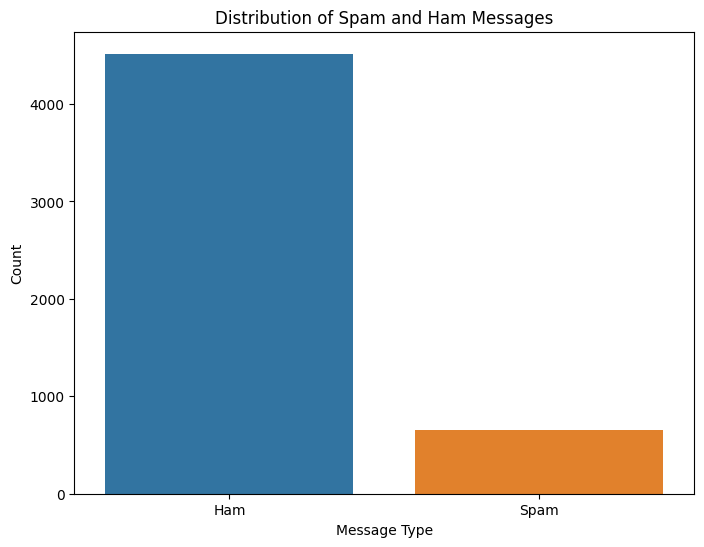

In [ ]:
# Create a bar plot to visualize the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

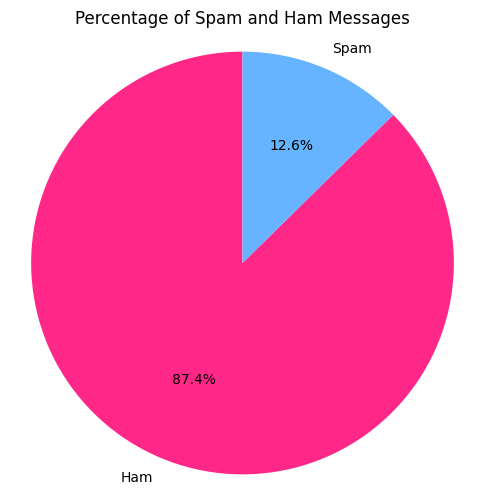

In [ ]:
# Count the number of spam and ham messages
spam_count = df['label'].value_counts()[1]
ham_count = df['label'].value_counts()[0]

# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['#ff2889', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Data Pre-processing**

*Text Preprocessing*:
To prepare the text data for classification, we perform text preprocessing, which includes:

* Removing special characters and digits.
* Removing stopwords.
* Converting text to lowercase.
* Tokenization.


*Feature Engineering* :
We create a copy of the DataFrame and modify it to prepare the data for classification. This involves mapping labels to numerical values and text processing.


*Feature Extraction :*
We transform the text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.

In [ ]:
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Define a function to preprocess text data
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in set(stopwords.words('english'))]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

In [ ]:
# Create a copy of the DataFrame and modify it
df_1 = df.copy()
# Create a copy of the 'message' column to avoid SettingWithCopyWarning
df_1['message'] = df_1['message'].apply(lambda x: preprocess_text(x))

In [ ]:
df_1['label'] = df_1['label'].map({'ham': 0, 'spam': 1})

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [ ]:
# Split the data into features (X) and labels (y)
X = df_1['message']
y = df_1['label']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# **SVM**

Support Vector Machines are powerful supervised learning models mainly used for binary classification. SVMs aim to find a hyperplane that maximizes the margin between two classes while minimizing overfitting. They can handle non-linear data by transforming it into a higher-dimensional space using kernel functions. SVMs are widely employed in various applications, including image classification and text categorization.

*Model Training and Evaluation* :
We train an SVM model using the TF-IDF features and evaluate its performance using the following metrics:
* Accuracy
* Classification Report (Precision, Recall, F1-score)
* Confusion Matrix

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train and evaluate SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict using SVM model
svm_predictions = svm_model.predict(vectorizer.transform(X_test))

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("\nSVM Classification Report:\n", svm_classification_report)
print("\nSVM Confusion Matrix:\n", svm_confusion_matrix)

SVM Accuracy: 0.9593810444874274

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       889
           1       0.78      0.99      0.87       145

    accuracy                           0.96      1034
   macro avg       0.89      0.97      0.92      1034
weighted avg       0.97      0.96      0.96      1034


SVM Confusion Matrix:
 [[849  40]
 [  2 143]]


# **Naive Bayes**
Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It assumes feature independence, simplifying probability calculations. Despite this "naive" assumption, Naive Bayes is effective in many real-world classification tasks, especially in natural language processing and spam email filtering. Various variants like Gaussian, Multinomial, and Bernoulli Naive Bayes are used for different data types. Naive Bayes is commonly applied in text classification, spam detection, sentiment analysis, and recommendation systems, performing well with moderate training data.


*Model Training and Evaluation*:

We also train a Naive Bayes classifier using the TF-IDF features and evaluate its performance using the same metrics:

* Accuracy
* Classification Report (Precision, Recall, F1-score)
* Confusion Matrix

In [ ]:
# Train and evaluate Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict using Naive Bayes model
nb_predictions = nb_model.predict(vectorizer.transform(X_test))

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

print("\nNaive Bayes Accuracy:", nb_accuracy)
print("\nNaive Bayes Classification Report:\n", nb_classification_report)
print("\nNaive Bayes Confusion Matrix:\n", nb_confusion_matrix)


Naive Bayes Accuracy: 0.9816247582205029

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.89      0.93       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Naive Bayes Confusion Matrix:
 [[886   3]
 [ 16 129]]


# **Conclusion**
*Support Vector Machine (SVM):*


1. Accuracy: 95.94%
2. F1-score for spam messages: 87%
3. F1-score for ham messages: 98%

*Naive Bayes:*


1. Accuracy: 98.16%
2. F1-score for spam messages: 93%
3. F1-score for ham messages: 99%

These results indicate that the Naive Bayes classifier outperformed the SVM classifier in terms of accuracy and precision. The project successfully demonstrated the effectiveness of both models for SMS spam classification, with Naive Bayes showing higher accuracy and a balanced performance in distinguishing between spam and ham messages.